# tweakfig Usage Examples

This notebook demonstrates how to use `tweakfig` to create publication-ready matplotlib figures with minimal effort.

In [1]:
# Install/reinstall tweakfig from the local directory
# This ensures you have the latest version with all updates
# IMPORTANT: After running this cell, restart the kernel (Kernel > Restart Kernel)
import sys
!{sys.executable} -m pip install -e .. --quiet
print("\n✓ Installation complete!")
print("⚠️  Please RESTART THE KERNEL now to use the updated version")

  DEPRECATION: Legacy editable install of tweakfig==0.2.0 from file:///Users/pmaksym/Library/CloudStorage/Box-Box/Code/tweakfig (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457

✓ Installation complete!
⚠️  Please RESTART THE KERNEL now to use the updated version


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import tweakfig
import tweakfig as tfp

print(f"tweakfig version: {tfp.__version__}")

tweakfig version: 0.2.0


## 1. Basic Styling with `PrettyMatplotlib()`

The `PrettyMatplotlib()` function applies publication-ready styling globally. Call it once at the start of your script or notebook.

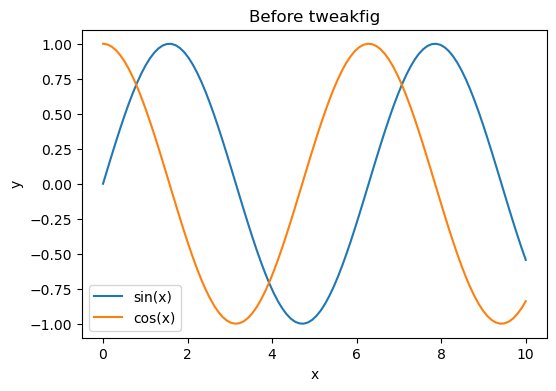

In [3]:
# Before applying tweakfig styling
fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Before tweakfig')
ax.legend()
plt.show()

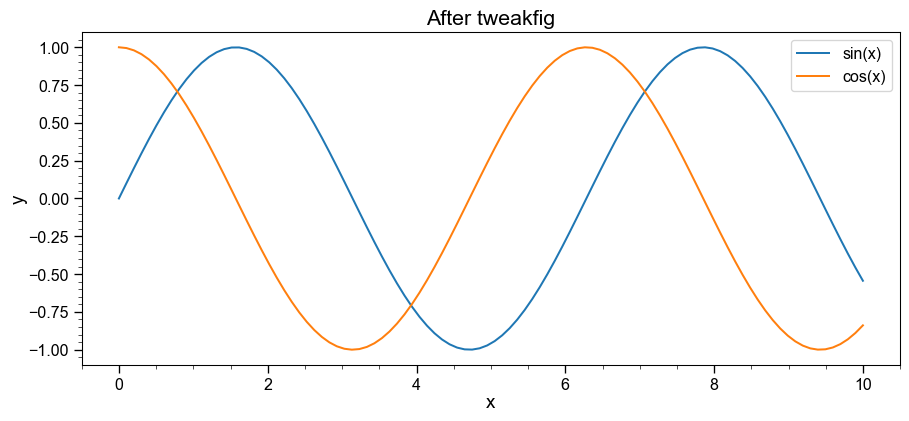

In [5]:
# Apply tweakfig styling using the Pretty() alias
tfp.Pretty()

# Same plot, now with prettier styling
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('After tweakfig')
ax.legend()
plt.show()

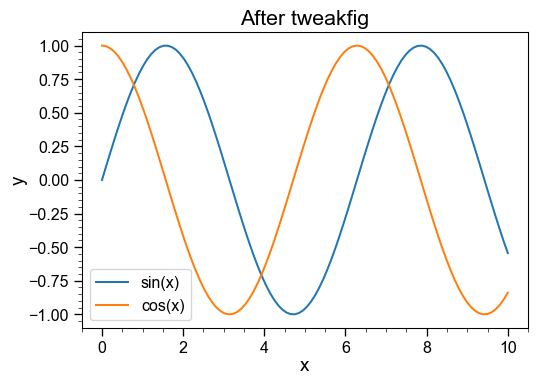

In [4]:
# Apply tweakfig styling using the Pretty() alias
tfp.Pretty()

# Same plot, now with prettier styling
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('After tweakfig')
ax.legend()
plt.show()

### Customizing the styling

You can adjust font scale globally or control individual font elements (labels, ticks, legend, title):

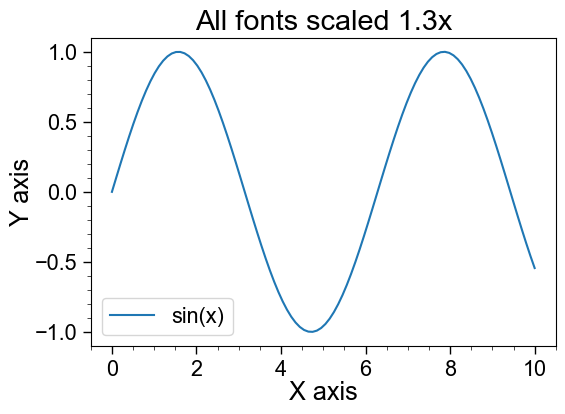

In [5]:
# Example 1: Scale all fonts uniformly (like before)
tfp.Pretty(font_scale=1.3)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, np.sin(x), label='sin(x)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('All fonts scaled 1.3x')
ax.legend()
plt.show()

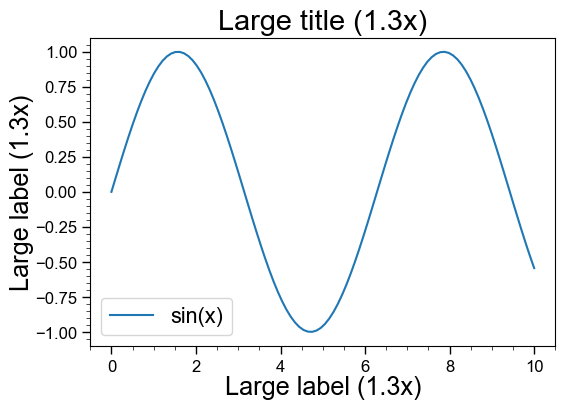

In [6]:
# Example 3: Scale all fonts, but override just the tick labels
tfp.Pretty(
    font_scale=1.3,      # Everything gets 1.3x
    tick_scale=1.0       # Except ticks stay at original size
)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, np.sin(x), label='sin(x)')
ax.set_xlabel('Large label (1.3x)')
ax.set_ylabel('Large label (1.3x)')
ax.set_title('Large title (1.3x)')
ax.legend()  # Large legend (1.3x)
# But tick numbers stay original size (1.0x)
plt.show()

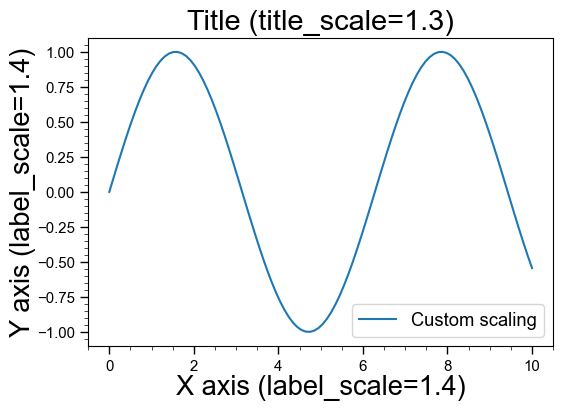

In [ ]:
# Example 2: Fine-grained control - different scales for different elements
tfp.Pretty(
    font_scale=1.0,      # Base scale
    label_scale=1.4,     # Larger axis labels
    tick_scale=0.9,      # Smaller tick numbers
    legend_scale=1.1,    # Slightly larger legend
    title_scale=1.3       # Larger title
)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, np.sin(x), label='Custom scaling')
ax.set_xlabel('X axis (label_scale=1.4)')
ax.set_ylabel('Y axis (label_scale=1.4)')
ax.set_title('Title (title_scale=1.3)')
ax.legend()
plt.show()

In [8]:
# Reset to default styling for rest of examples
tfp.Pretty()

## 2. Controlling Tick Counts with `num_ticks()`

Fine-tune the number of major and minor ticks on your axes:

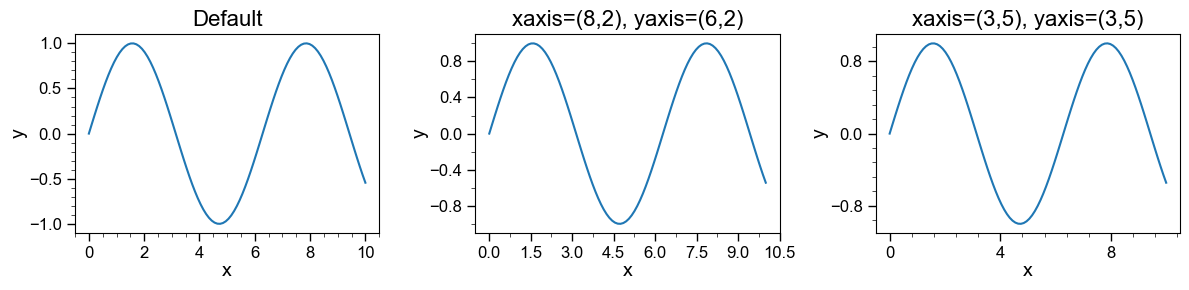

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax in axes:
    ax.plot(x, np.sin(x))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Default ticks
axes[0].set_title('Default')

# More major ticks, fewer minor ticks
tfp.num_ticks(axes[1], xaxis=(8, 2), yaxis=(6, 2))
axes[1].set_title('xaxis=(8,2), yaxis=(6,2)')

# Fewer major ticks, more minor ticks
tfp.num_ticks(axes[2], xaxis=(3, 5), yaxis=(3, 5))
axes[2].set_title('xaxis=(3,5), yaxis=(3,5)')

plt.tight_layout()
plt.show()

### Individual axis control

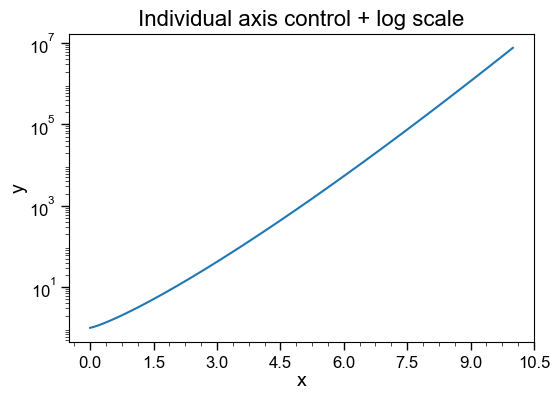

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(x, np.exp(x**1.2))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Only adjust x-axis
tfp.x_num_ticks(ax, xaxis=(10, 4))


# Only adjust y-axis (works with log scale too!)
ax.set_yscale('log')
tfp.y_num_ticks(ax, yaxis=(4, 10), log_scale=True)

ax.set_title('Individual axis control + log scale')
plt.show()

## 3. Color Utilities

### `colorFader()` - Interpolate between colors

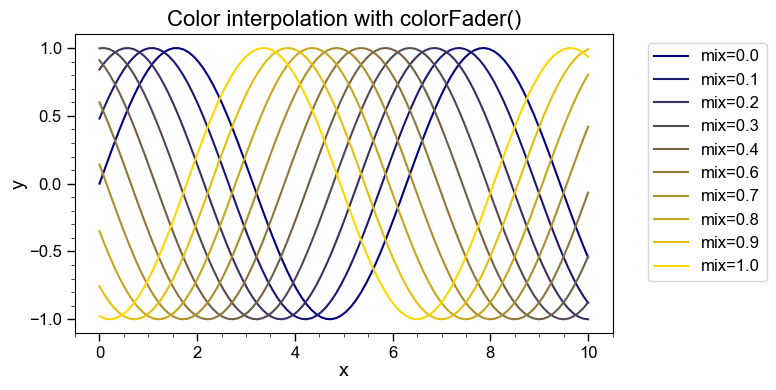

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))

n_lines = 10
for i in range(n_lines):
    mix = i / (n_lines - 1)
    color = tfp.colorFader('navy', 'gold', mix)
    ax.plot(x, np.sin(x + i * 0.5), color=color, label=f'mix={mix:.1f}')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Color interpolation with colorFader()')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### `plot_array()` - Plot multiple arrays with automatic colormap

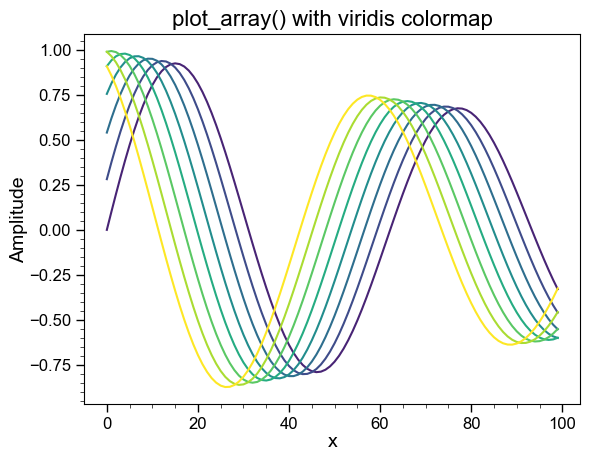

In [12]:
# Create sample data (e.g., spectra at different parameters)
data = [np.sin(x + phase) * np.exp(-x/20) for phase in np.linspace(0, 2, 8)]

# Plot with automatic viridis colormap
fig, ax = tfp.plot_array(data, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude')
ax.set_title('plot_array() with viridis colormap')
plt.show()

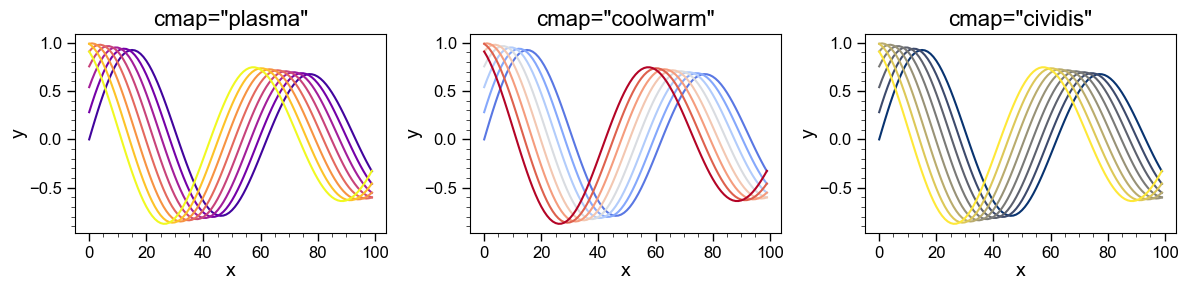

In [13]:
# Try different colormaps
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax, cmap in zip(axes, ['plasma', 'coolwarm', 'cividis']):
    tfp.plot_array(data, ax=ax, cmap=cmap)
    ax.set_title(f'cmap="{cmap}"')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

## 4. Image Cropping for Clean Exports

Remove transparent or white borders from saved figures:

In [14]:
import os

# Create a figure with transparent background
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, np.sin(x))
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

# Save with transparent background
output_dir = 'temp_figures'
os.makedirs(output_dir, exist_ok=True)

original_path = f'{output_dir}/original.png'
cropped_path = f'{output_dir}/cropped.png'

fig.savefig(original_path, dpi=150, transparent=True, bbox_inches='tight')
plt.close()

# Autocrop the image
result = tfp.autocrop_png(original_path, cropped_path, border=10)
print(result)

Cropped image saved to temp_figures/cropped.png


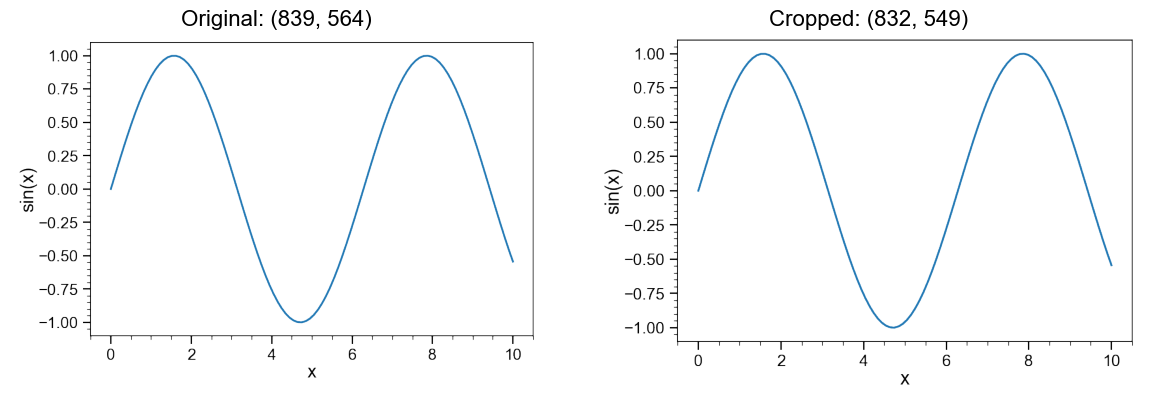

In [15]:
# Compare original and cropped
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

original = Image.open(original_path)
cropped = Image.open(cropped_path)

axes[0].imshow(original)
axes[0].set_title(f'Original: {original.size}')
axes[0].axis('off')

axes[1].imshow(cropped)
axes[1].set_title(f'Cropped: {cropped.size}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Clean up temp files
import shutil
shutil.rmtree(output_dir, ignore_errors=True)

## 5. Complete Workflow Example

Here's a typical workflow combining all features:

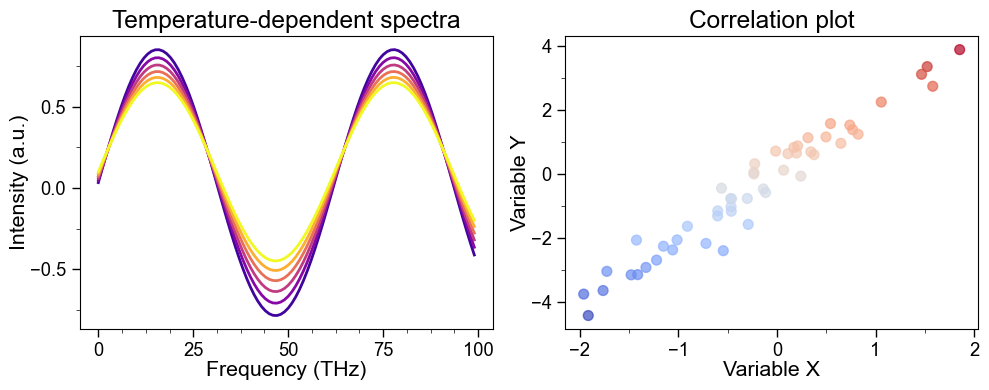

In [17]:
# 1. Apply global styling at the start
tfp.PrettyMatplotlib(fig_font_scale=1.1)

# 2. Create your figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left panel: line plot with color gradient
temperatures = np.linspace(100, 300, 6)
spectra = [np.sin(x) * np.exp(-T/500) + 0.1 * T/300 for T in temperatures]
tfp.plot_array(spectra, ax=axes[0], cmap='plasma', lw=2)
axes[0].set_xlabel('Frequency (THz)')
axes[0].set_ylabel('Intensity (a.u.)')
axes[0].set_title('Temperature-dependent spectra')

# 3. Fine-tune ticks
tfp.num_ticks(axes[0], xaxis=(5, 4), yaxis=(4, 2))

# Right panel: scatter plot
np.random.seed(42)
x_data = np.random.randn(50)
y_data = 2 * x_data + np.random.randn(50) * 0.5
axes[1].scatter(x_data, y_data, c=y_data, cmap='coolwarm', alpha=0.7, s=50)
axes[1].set_xlabel('Variable X')
axes[1].set_ylabel('Variable Y')
axes[1].set_title('Correlation plot')
tfp.num_ticks(axes[1], xaxis=(5, 2), yaxis=(5, 2))

plt.tight_layout()
plt.show()

## 6. New Utility Functions

### Style Presets

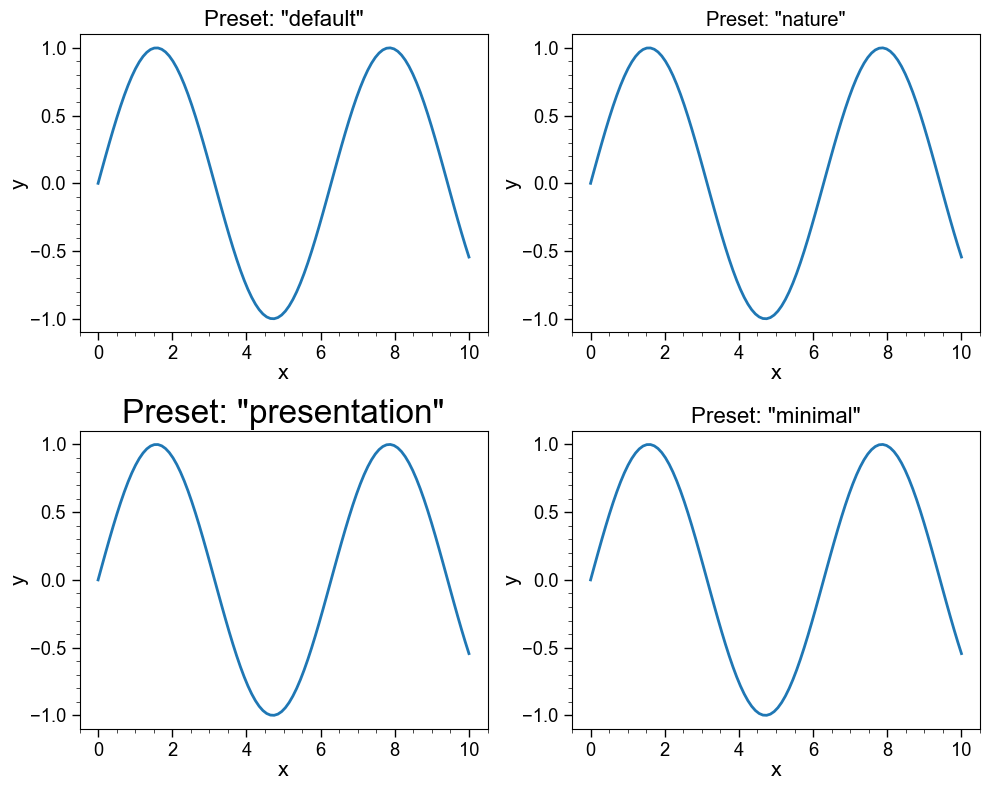

In [18]:
# Try different style presets
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

presets = ['default', 'nature', 'presentation', 'minimal']
for ax, preset in zip(axes.flat, presets):
    tfp.set_preset(preset)
    ax.plot(x, np.sin(x), lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Preset: "{preset}"')

plt.tight_layout()
plt.show()

# Reset to default
tfp.Pretty()

### Spine Styling and Subplot Annotations

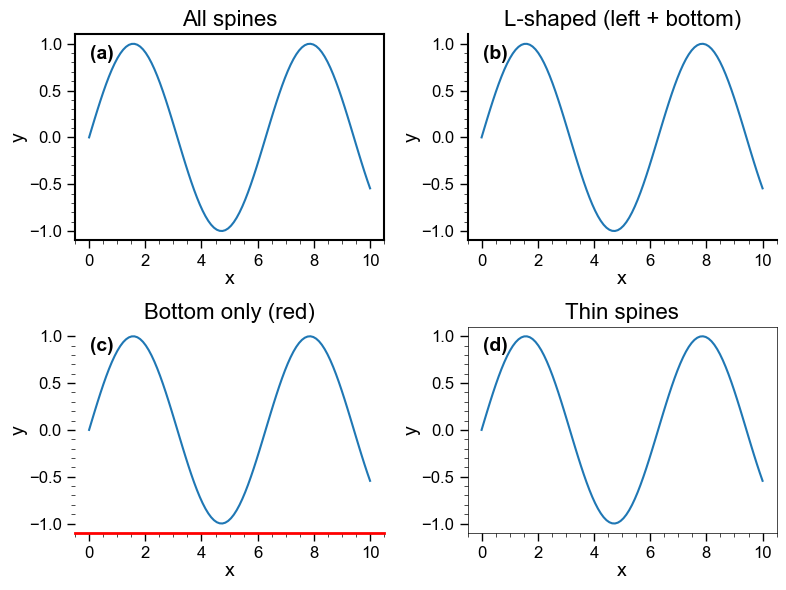

In [19]:
# Spine styling and automatic subplot labels
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for ax in axes.flat:
    ax.plot(x, np.sin(x))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Different spine styles for each subplot
tfp.set_spine_style(axes[0, 0], spines='all', linewidth=1.5)
axes[0, 0].set_title('All spines')

tfp.set_spine_style(axes[0, 1], spines='L', linewidth=1.5)
axes[0, 1].set_title('L-shaped (left + bottom)')

tfp.set_spine_style(axes[1, 0], spines=['bottom'], linewidth=2, color='red')
axes[1, 0].set_title('Bottom only (red)')

tfp.set_spine_style(axes[1, 1], spines='all', linewidth=0.5)
axes[1, 1].set_title('Thin spines')

# Add (a), (b), (c), (d) labels automatically
tfp.annotate_subplots(axes, prefix='(', suffix=')')

plt.tight_layout()
plt.show()

### Aspect Ratio and Easy Saving

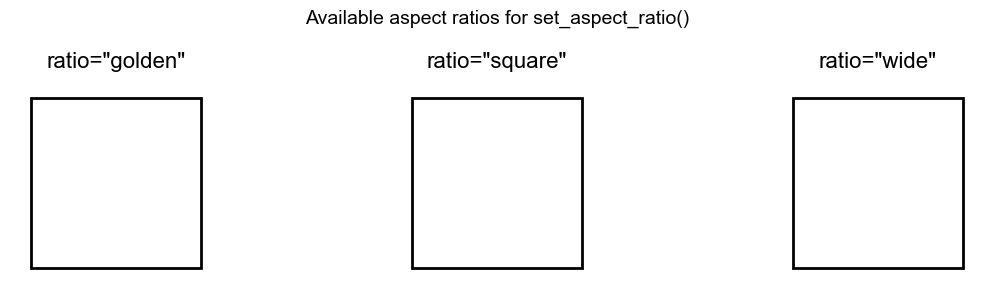

In [20]:
# Demonstrate aspect ratios
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

ratios = ['golden', 'square', 'wide']
for ax, ratio in zip(axes, ratios):
    # Create a small figure to show the ratio
    ax.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, lw=2))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_title(f'ratio="{ratio}"')
    ax.axis('off')

plt.suptitle('Available aspect ratios for set_aspect_ratio()', fontsize=14)
plt.tight_layout()
plt.show()

# Note: savefig_tight() combines saving + autocropping in one call:
# tfp.savefig_tight(fig, 'my_figure.png', dpi=300)

**Note:** The generated `.vsz` files can be opened directly in Veusz:
- `File → Open → temperature_spectra.vsz`
- All data is embedded in the file (no separate data files needed)
- Full control over line styles, colors, axes, labels in Veusz GUI
- Export to PDF, SVG, PNG for publications

In [21]:
# Generate synthetic 3D hyperspectral data (x, y, energy)
x_3d = np.linspace(-1, 1, 50)
y_3d = np.linspace(-1, 1, 50)
energy = np.linspace(0, 2, 100)

# Create a simple hyperspectral dataset
# Intensity varies with position and energy
X_3d, Y_3d, E_3d = np.meshgrid(x_3d, y_3d, energy, indexing='ij')
hyperspectral = np.exp(-(X_3d**2 + Y_3d**2)) * np.exp(-(E_3d - 1)**2 / 0.2)

# Extract spectra at different spatial positions
positions = [(-0.5, 0), (0, 0), (0.5, 0)]
pos_colors = ['blue', 'red', 'green']

datasets_3d = []
for (px, py), color in zip(positions, pos_colors):
    # Find nearest indices
    ix = np.argmin(np.abs(x_3d - px))
    iy = np.argmin(np.abs(y_3d - py))
    spectrum = hyperspectral[ix, iy, :]
    
    datasets_3d.append({
        'x': energy,
        'y': spectrum,
        'color': color,
        'label': f'Position ({px:.1f}, {py:.1f})'
    })

# Save to Veusz
tfp.save_veusz(
    'hyperspectral_spectra',
    datasets=datasets_3d,
    x_label='Energy (eV)',
    y_label='Intensity (a.u.)',
    x_scale='linear',
    y_scale='linear',
    ylim=(0, None)
)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Left: Energy-integrated spatial map
spatial_map = np.sum(hyperspectral, axis=2)
im = ax1.imshow(spatial_map.T, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis', aspect='auto')
for (px, py), color in zip(positions, pos_colors):
    ax1.plot(px, py, 'o', color=color, markersize=10, markeredgecolor='white', markeredgewidth=2)
ax1.set_xlabel('Position x')
ax1.set_ylabel('Position y')
ax1.set_title('Spatial Map (energy integrated)')
plt.colorbar(im, ax=ax1, label='Total Intensity')

# Right: Spectra at selected positions
for ds in datasets_3d:
    ax2.plot(ds['x'], ds['y'], color=ds['color'], label=ds['label'], lw=2)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Intensity (a.u.)')
ax2.set_title('Spatially-resolved Spectra')
ax2.legend()

plt.tight_layout()
plt.show()

AttributeError: module 'tweakfig' has no attribute 'save_veusz'

### Example 3: 3D hyperspectral data - Energy-resolved spatial maps

For hyperspectral data (spatial + energy), we can export energy slices or spatial averages:

In [ ]:
# Generate synthetic 2D conductance map
x_2d = np.linspace(-2, 2, 100)
y_2d = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_2d, y_2d)
conductance = np.exp(-(X**2 + Y**2)) * np.sin(5*X) * np.cos(5*Y)

# Extract line cuts at different y positions
y_positions = [-1.0, 0.0, 1.0]
linecut_colors = ['purple', 'black', 'orange']

datasets_2d = []
for y_pos, color in zip(y_positions, linecut_colors):
    idx = np.argmin(np.abs(y_2d - y_pos))
    linecut = conductance[idx, :]
    datasets_2d.append({
        'x': x_2d,
        'y': linecut,
        'color': color,
        'label': f'y = {y_pos:.1f}'
    })

# Save line cuts to Veusz
tfp.save_veusz(
    'conductance_linecuts',
    datasets=datasets_2d,
    x_label='Position x',
    y_label='Conductance (e²/h)',
    x_scale='linear',
    y_scale='linear',
    xlim=(-2, 2)
)

# Visualize the 2D map and line cuts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Left: 2D map with line positions
im = ax1.imshow(conductance, extent=[-2, 2, -2, 2], origin='lower', cmap='RdBu_r', aspect='auto')
for y_pos, color in zip(y_positions, linecut_colors):
    ax1.axhline(y_pos, color=color, linestyle='--', alpha=0.7, lw=2)
ax1.set_xlabel('Position x')
ax1.set_ylabel('Position y')
ax1.set_title('2D Conductance Map')
plt.colorbar(im, ax=ax1, label='G (e²/h)')

# Right: Line cuts
for ds in datasets_2d:
    ax2.plot(ds['x'], ds['y'], color=ds['color'], label=ds['label'], lw=2)
ax2.set_xlabel('Position x')
ax2.set_ylabel('Conductance (e²/h)')
ax2.set_title('Line Cuts')
ax2.legend()
ax2.axhline(0, color='gray', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

### Example 2: 2D image data - Conductance map with line cuts

In [1]:
# Generate synthetic temperature-dependent spectra
freq = np.linspace(0, 10, 200)
temperatures = [100, 150, 200, 250, 300]
colors = ['blue', 'cyan', 'green', 'orange', 'red']

# Create dataset list for Veusz
datasets = []
for T, color in zip(temperatures, colors):
    spectrum = np.sin(freq) * np.exp(-freq/5) * (1 + T/500)
    datasets.append({
        'x': freq,
        'y': spectrum,
        'color': color,
        'label': f'{T} K'
    })

# Save to Veusz format
tfp.save_veusz(
    'temperature_spectra',
    datasets=datasets,
    x_label='Frequency (THz)',
    y_label='Intensity (a.u.)',
    x_scale='linear',
    y_scale='linear'
)

# Also plot in matplotlib for comparison
fig, ax = plt.subplots(figsize=(8, 5))
for ds in datasets:
    ax.plot(ds['x'], ds['y'], color=ds['color'], label=ds['label'], lw=2)
ax.set_xlabel('Frequency (THz)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Temperature-dependent spectra')
ax.legend(title='Temperature')
plt.show()

NameError: name 'np' is not defined

## 7. Exporting to Veusz

The `save_veusz()` function exports your data to a `.vsz` file that can be opened directly in Veusz for publication-quality vector graphics.

### Example 1: 1D data - Temperature-dependent spectra

## Summary

| Function | Purpose |
|----------|--------|
| `Pretty()` / `PrettyMatplotlib()` | Apply publication-ready global styling |
| → `font_scale` | Scale all fonts uniformly |
| → `label_scale`, `tick_scale`, `legend_scale`, `title_scale` | Fine-grained font control |
| `set_preset()` | Apply predefined presets ('nature', 'presentation', etc.) |
| `num_ticks()` | Control major/minor tick counts |
| `x_num_ticks()` / `y_num_ticks()` | Control individual axis ticks |
| `set_spine_style()` | Control axis spine visibility and style |
| `set_aspect_ratio()` | Set figure to golden ratio, square, etc. |
| `annotate_subplots()` | Add (a), (b), (c) labels to subplots |
| `colorFader()` | Interpolate between two colors |
| `plot_array()` | Plot multiple arrays with colormap |
| `savefig_tight()` | Save with tight layout + autocrop |
| `autocrop_png()` | Remove transparent borders from images |
| `autocrop_png_whitespace()` | Remove white + transparent borders |
| `save_veusz()` | Export data to Veusz format (.vsz) for publication graphics |